In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# DATA SET 15

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2015.csv")
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2015-10-01 01:00:00,NaN,0.8,NaN,NaN,90.0,82.0,NaN,NaN,NaN,10.0,NaN,NaN,28079004
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008
2,2015-10-01 01:00:00,3.1,NaN,1.8,NaN,29.0,97.0,NaN,NaN,NaN,NaN,NaN,7.1,28079011
3,2015-10-01 01:00:00,NaN,0.6,NaN,NaN,30.0,103.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2015-10-01 01:00:00,NaN,NaN,NaN,NaN,95.0,96.0,2.0,NaN,NaN,9.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210091,2015-08-01 00:00:00,NaN,0.2,NaN,NaN,11.0,33.0,53.0,NaN,NaN,NaN,NaN,NaN,28079056
210092,2015-08-01 00:00:00,NaN,0.2,NaN,NaN,1.0,5.0,NaN,26.0,NaN,10.0,NaN,NaN,28079057
210093,2015-08-01 00:00:00,NaN,NaN,NaN,NaN,1.0,7.0,74.0,NaN,NaN,NaN,NaN,NaN,28079058
210094,2015-08-01 00:00:00,NaN,NaN,NaN,NaN,3.0,7.0,65.0,NaN,NaN,NaN,NaN,NaN,28079059


In [3]:
b=a.fillna(value=10)
b

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2015-10-01 01:00:00,10.0,0.8,10.0,10.00,90.0,82.0,10.0,10.0,10.0,10.0,10.00,10.0,28079004
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008
2,2015-10-01 01:00:00,3.1,10.0,1.8,10.00,29.0,97.0,10.0,10.0,10.0,10.0,10.00,7.1,28079011
3,2015-10-01 01:00:00,10.0,0.6,10.0,10.00,30.0,103.0,2.0,10.0,10.0,10.0,10.00,10.0,28079016
4,2015-10-01 01:00:00,10.0,10.0,10.0,10.00,95.0,96.0,2.0,10.0,10.0,9.0,10.00,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210091,2015-08-01 00:00:00,10.0,0.2,10.0,10.00,11.0,33.0,53.0,10.0,10.0,10.0,10.00,10.0,28079056
210092,2015-08-01 00:00:00,10.0,0.2,10.0,10.00,1.0,5.0,10.0,26.0,10.0,10.0,10.00,10.0,28079057
210093,2015-08-01 00:00:00,10.0,10.0,10.0,10.00,1.0,7.0,74.0,10.0,10.0,10.0,10.00,10.0,28079058
210094,2015-08-01 00:00:00,10.0,10.0,10.0,10.00,3.0,7.0,65.0,10.0,10.0,10.0,10.00,10.0,28079059


In [4]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210096 entries, 0 to 210095
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     210096 non-null  object 
 1   BEN      210096 non-null  float64
 2   CO       210096 non-null  float64
 3   EBE      210096 non-null  float64
 4   NMHC     210096 non-null  float64
 5   NO       210096 non-null  float64
 6   NO_2     210096 non-null  float64
 7   O_3      210096 non-null  float64
 8   PM10     210096 non-null  float64
 9   PM25     210096 non-null  float64
 10  SO_2     210096 non-null  float64
 11  TCH      210096 non-null  float64
 12  TOL      210096 non-null  float64
 13  station  210096 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 22.4+ MB


In [5]:
b.describe()

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
count,210096.000000,210096.000000,210096.000000,210096.000000,210096.000000,210096.000000,210096.000000,210096.000000,210096.000000,210096.000000,210096.000000,210096.000000,2.100960e+05
mean,7.754568,6.018759,7.694482,8.806147,26.633977,40.789934,33.483746,15.388437,10.342286,8.710118,8.959517,8.346459,2.807904e+07
std,3.994377,4.747272,4.097230,3.195580,59.401377,32.720288,33.944138,12.595852,4.136280,3.586675,2.785287,3.619478,1.761807e+01
min,0.100000,0.100000,0.100000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.010000,0.100000,2.807900e+07
25%,10.000000,0.300000,10.000000,10.000000,2.000000,16.000000,10.000000,10.000000,10.000000,7.000000,10.000000,10.000000,2.807902e+07
50%,10.000000,10.000000,10.000000,10.000000,6.000000,32.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.807904e+07
75%,10.000000,10.000000,10.000000,10.000000,22.000000,57.000000,56.000000,17.000000,10.000000,10.000000,10.000000,10.000000,2.807906e+07
max,17.700001,10.000000,19.700001,10.000000,1146.000000,424.000000,236.000000,250.000000,88.000000,94.000000,10.000000,138.000000,2.807906e+07


In [6]:
c=b.head(1000)
c

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2015-10-01 01:00:00,10.0,0.8,10.0,10.00,90.0,82.0,10.0,10.0,10.0,10.0,10.00,10.0,28079004
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008
2,2015-10-01 01:00:00,3.1,10.0,1.8,10.00,29.0,97.0,10.0,10.0,10.0,10.0,10.00,7.1,28079011
3,2015-10-01 01:00:00,10.0,0.6,10.0,10.00,30.0,103.0,2.0,10.0,10.0,10.0,10.00,10.0,28079016
4,2015-10-01 01:00:00,10.0,10.0,10.0,10.00,95.0,96.0,2.0,10.0,10.0,9.0,10.00,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015-10-02 18:00:00,10.0,0.2,10.0,10.00,9.0,28.0,79.0,10.0,10.0,10.0,10.00,10.0,28079039
996,2015-10-02 18:00:00,10.0,10.0,10.0,10.00,6.0,22.0,10.0,18.0,10.0,3.0,10.00,10.0,28079040
997,2015-10-02 18:00:00,10.0,10.0,10.0,10.00,5.0,5.0,10.0,11.0,2.0,10.0,10.00,10.0,28079047
998,2015-10-02 18:00:00,10.0,10.0,10.0,10.00,8.0,33.0,10.0,19.0,9.0,10.0,10.00,10.0,28079048


In [7]:
c.columns

Index(['date', 'BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [8]:
d=c[['BEN', 'CO', 'EBE','NMHC', 'NO_2','O_3',
       'PM10','SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL,station
0,10.0,0.8,10.0,10.00,82.0,10.0,10.0,10.0,10.00,10.0,28079004
1,2.0,0.8,1.6,0.33,95.0,4.0,37.0,12.0,1.83,8.3,28079008
2,3.1,10.0,1.8,10.00,97.0,10.0,10.0,10.0,10.00,7.1,28079011
3,10.0,0.6,10.0,10.00,103.0,2.0,10.0,10.0,10.00,10.0,28079016
4,10.0,10.0,10.0,10.00,96.0,2.0,10.0,9.0,10.00,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...
995,10.0,0.2,10.0,10.00,28.0,79.0,10.0,10.0,10.00,10.0,28079039
996,10.0,10.0,10.0,10.00,22.0,10.0,18.0,3.0,10.00,10.0,28079040
997,10.0,10.0,10.0,10.00,5.0,10.0,11.0,10.0,10.00,10.0,28079047
998,10.0,10.0,10.0,10.00,33.0,10.0,19.0,10.0,10.00,10.0,28079048


# LINEAR REGRESSION

In [9]:
x=d[['BEN', 'CO', 'EBE','NMHC', 'NO_2','O_3',
       'PM10','SO_2', 'TCH', 'TOL']]
y=d['station']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_)


28079043.984259345


In [13]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-7.572732
CO,1.293196
EBE,10.102804
NMHC,14.861600
NO_2,-0.130459
O_3,-0.022107
PM10,0.391621
SO_2,1.462231
TCH,-18.069968
TOL,-1.642270


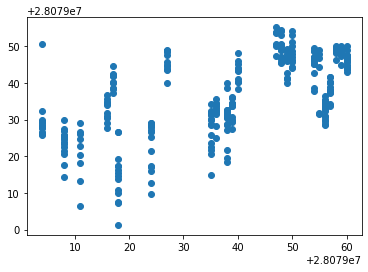

In [14]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [15]:
print(lr.score(x_test,y_test))

0.39802606564119936


In [16]:
lr.score(x_train,y_train)

0.38879682094312185

# LASSO REGRESSION

In [17]:
from sklearn.linear_model import Ridge,Lasso

In [18]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [19]:
la.score(x_test,y_test)

0.3028553701936847

# RIDGE REGRESSION

In [20]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [21]:
rr.score(x_test,y_test)

0.38420245909359985

# LOGISTIC REGRESSION

In [22]:
w=d.iloc[:,0:10]
w1=d.iloc[:,-1]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
b=StandardScaler().fit_transform(w)


In [25]:
from sklearn.model_selection import train_test_split
w_train,w_test,w1_train,w1_test=train_test_split(w,w1,test_size=0.7)

In [26]:
p=LogisticRegression(max_iter=10000)
p.fit(b,w1)

LogisticRegression(max_iter=10000)

In [27]:
t=[[12,22,32,42,52,45,32,56,87,30]]


In [28]:
e=p.predict(t)
print(e)

[28079060]


In [29]:
p.classes_

array([28079004, 28079008, 28079011, 28079016, 28079017, 28079018,
       28079024, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079048, 28079049, 28079050, 28079054,
       28079055, 28079056, 28079057, 28079058, 28079059, 28079060],
      dtype=int64)

In [30]:
print(p.score(w_test,w1_test))

0.045714285714285714


In [31]:
p.predict_proba(t)[0][0]

1.2688804643941838e-220

In [32]:
p.predict_proba(t)[0][1]

5.47109495484258e-158

# ELASTIC NET

In [33]:
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [34]:
print(p.coef_)

[ 0.50586528  1.23857612  1.7152493  -0.41735024 -0.13221082 -0.00736492
  0.34275526  0.92163492 -0.29016706 -0.87699552]


In [35]:
print(p.intercept_)

28079019.687492587


In [36]:
print(p.predict(x_test))

[28079035.05767004 28079035.02120319 28079031.94804501 28079045.42228409
 28079027.35689539 28079028.77333607 28079034.76414646 28079035.06539271
 28079024.29316714 28079033.93057382 28079035.96239709 28079026.62395123
 28079043.46606006 28079034.08099758 28079038.9704271  28079043.22375194
 28079013.61834949 28079027.23266684 28079049.6344302  28079026.9595472
 28079042.20295315 28079029.3454766  28079034.88198519 28079027.75543894
 28079025.18078013 28079048.72259028 28079047.38680732 28079047.75473449
 28079047.69581512 28079044.70285852 28079036.15990391 28079045.31452966
 28079045.21032832 28079044.73180916 28079020.22175485 28079033.53113278
 28079045.53696792 28079024.80616873 28079046.75785452 28079045.62198983
 28079049.24187038 28079049.71508658 28079031.48303518 28079023.71215791
 28079042.71584825 28079029.48316341 28079025.80468992 28079029.54261506
 28079035.57923535 28079048.90709179 28079030.55755942 28079026.41408852
 28079028.7321114  28079039.47602398 28079049.075274

In [37]:
print(p.score(x_test,y_test))

0.36124348814455853


# RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
parameters={'max_depth':[1,57,67,53,57],
  'min_samples_leaf':[5,34,67,7,45],
           'n_estimators':[2,45,56,23,56]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 57, 67, 53, 57],
                         'min_samples_leaf': [5, 34, 67, 7, 45],
                         'n_estimators': [2, 45, 56, 23, 56]},
             scoring='accuracy')

In [41]:
grid_search.best_score_

0.6742857142857143

In [42]:
rfc_best=grid_search.best_estimator_

[Text(596.8676985981309, 2561.1923076923076, 'X[3] <= 5.365\ngini = 0.956\nsamples = 448\nvalue = [27, 26, 29, 38, 41, 33, 31, 24, 22, 21, 30, 30\n32, 42, 28, 23, 28, 31, 34, 15, 39, 37, 25, 14]'),
 Text(208.5981308411215, 2356.296923076923, 'X[5] <= 12.0\ngini = 0.663\nsamples = 52\nvalue = [0, 26, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 34, 0, 0, 0, 0, 0]'),
 Text(104.29906542056075, 2151.4015384615386, 'X[6] <= 13.5\ngini = 0.411\nsamples = 28\nvalue = [0, 3, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 34, 0, 0, 0, 0, 0]'),
 Text(52.149532710280376, 1946.5061538461537, 'gini = 0.48\nsamples = 7\nvalue = [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 9, 0, 0, 0, 0, 0]'),
 Text(156.44859813084113, 1946.5061538461537, 'X[4] <= 80.5\ngini = 0.331\nsamples = 21\nvalue = [0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 25, 0, 0, 0, 0, 0]'),
 Text(104.29906542056075, 1741.6107692307692, 'X[9] <= 2.45\ngini = 0.08\nsamples = 15\nvalue = [0, 0, 0, 0, 0, 0, 1, 0, 0,

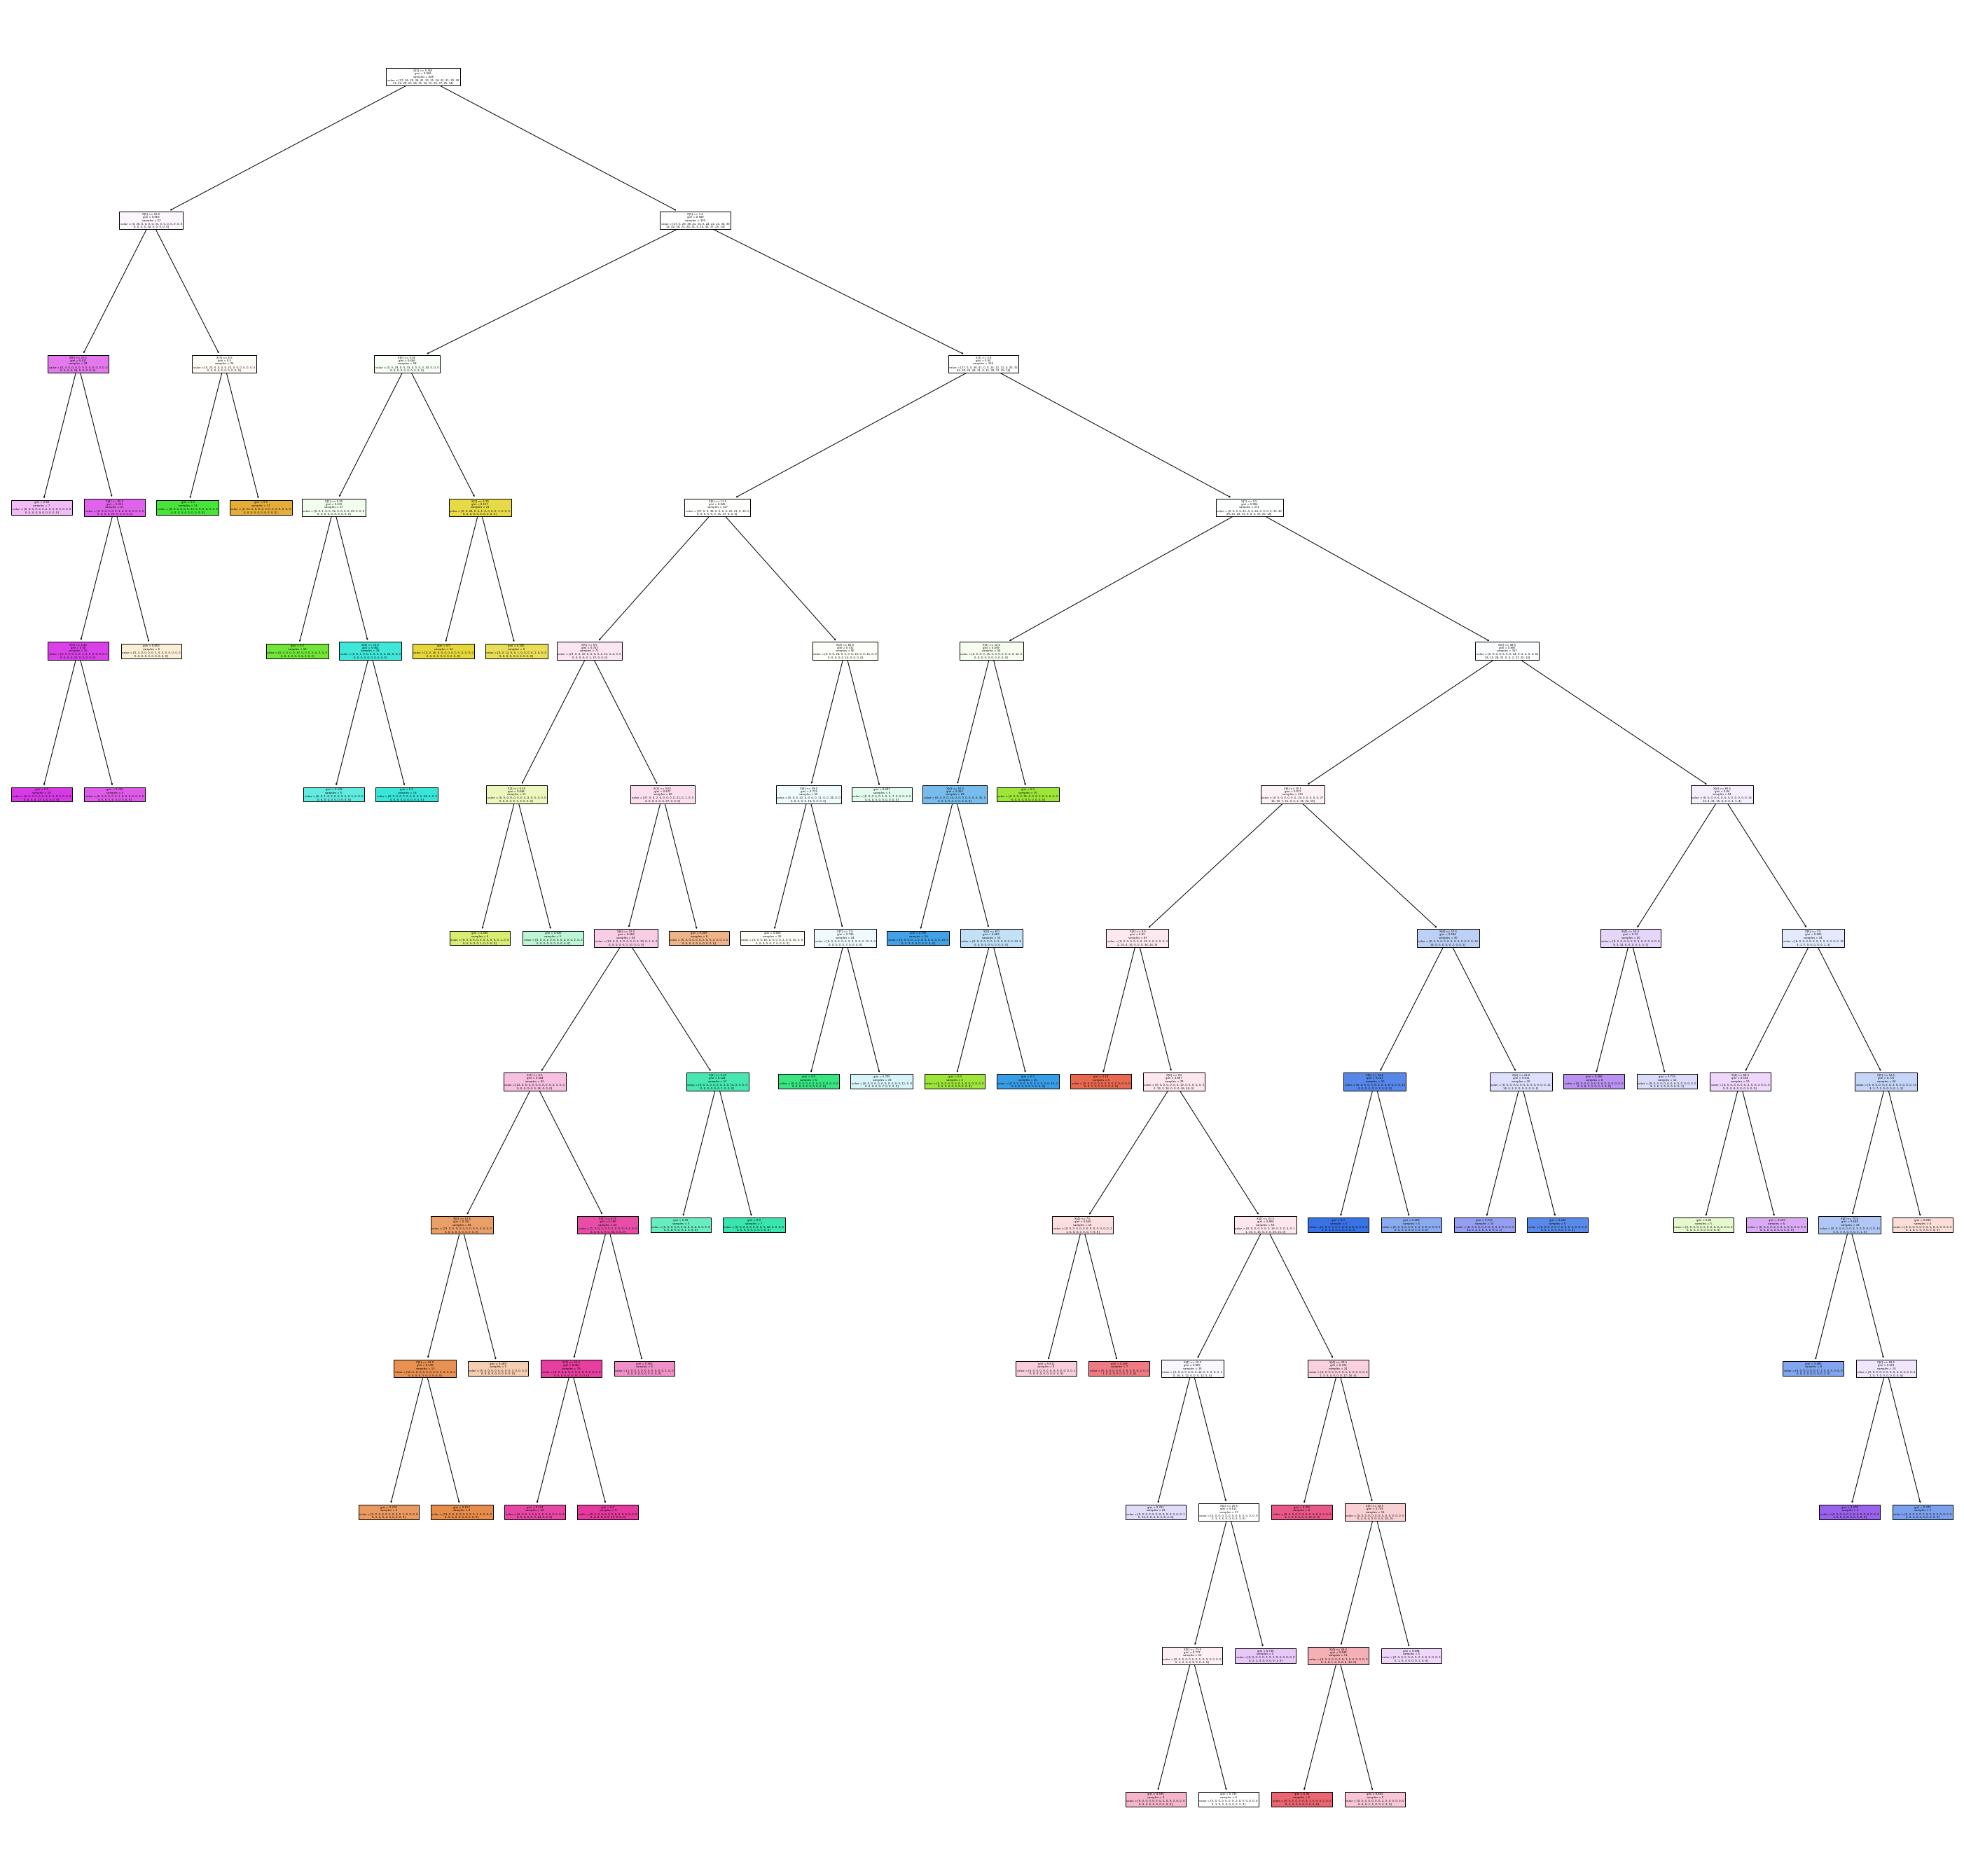

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:Random Forest score=0.6742857142857143 is a Highest accuracy

# DATA SET 16

In [44]:
s=pd.read_csv(r"C:\Users\user\Downloads\C10_air\csvs_per_year\csvs_per_year\madrid_2016.csv")
s

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2016-11-01 01:00:00,NaN,0.7,NaN,NaN,153.0,77.0,NaN,NaN,NaN,7.0,NaN,NaN,28079004
1,2016-11-01 01:00:00,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,2016-11-01 01:00:00,5.9,NaN,7.5,NaN,297.0,139.0,NaN,NaN,NaN,NaN,NaN,26.0,28079011
3,2016-11-01 01:00:00,NaN,1.0,NaN,NaN,154.0,113.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2016-11-01 01:00:00,NaN,NaN,NaN,NaN,275.0,127.0,2.0,NaN,NaN,18.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209491,2016-07-01 00:00:00,NaN,0.2,NaN,NaN,2.0,29.0,73.0,NaN,NaN,NaN,NaN,NaN,28079056
209492,2016-07-01 00:00:00,NaN,0.3,NaN,NaN,1.0,29.0,NaN,36.0,NaN,5.0,NaN,NaN,28079057
209493,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,1.0,19.0,71.0,NaN,NaN,NaN,NaN,NaN,28079058
209494,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,6.0,17.0,85.0,NaN,NaN,NaN,NaN,NaN,28079059


In [45]:
s1=s.fillna(value=4)
s1

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2016-11-01 01:00:00,4.0,0.7,4.0,4.00,153.0,77.0,4.0,4.0,4.0,7.0,4.00,4.0,28079004
1,2016-11-01 01:00:00,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,2016-11-01 01:00:00,5.9,4.0,7.5,4.00,297.0,139.0,4.0,4.0,4.0,4.0,4.00,26.0,28079011
3,2016-11-01 01:00:00,4.0,1.0,4.0,4.00,154.0,113.0,2.0,4.0,4.0,4.0,4.00,4.0,28079016
4,2016-11-01 01:00:00,4.0,4.0,4.0,4.00,275.0,127.0,2.0,4.0,4.0,18.0,4.00,4.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209491,2016-07-01 00:00:00,4.0,0.2,4.0,4.00,2.0,29.0,73.0,4.0,4.0,4.0,4.00,4.0,28079056
209492,2016-07-01 00:00:00,4.0,0.3,4.0,4.00,1.0,29.0,4.0,36.0,4.0,5.0,4.00,4.0,28079057
209493,2016-07-01 00:00:00,4.0,4.0,4.0,4.00,1.0,19.0,71.0,4.0,4.0,4.0,4.00,4.0,28079058
209494,2016-07-01 00:00:00,4.0,4.0,4.0,4.00,6.0,17.0,85.0,4.0,4.0,4.0,4.00,4.0,28079059


In [46]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209496 entries, 0 to 209495
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     209496 non-null  object 
 1   BEN      209496 non-null  float64
 2   CO       209496 non-null  float64
 3   EBE      209496 non-null  float64
 4   NMHC     209496 non-null  float64
 5   NO       209496 non-null  float64
 6   NO_2     209496 non-null  float64
 7   O_3      209496 non-null  float64
 8   PM10     209496 non-null  float64
 9   PM25     209496 non-null  float64
 10  SO_2     209496 non-null  float64
 11  TCH      209496 non-null  float64
 12  TOL      209496 non-null  float64
 13  station  209496 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 22.4+ MB


In [47]:
s2=s1.head(100)
s2

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2016-11-01 01:00:00,4.0,0.7,4.0,4.00,153.0,77.0,4.0,4.0,4.0,7.0,4.00,4.0,28079004
1,2016-11-01 01:00:00,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,2016-11-01 01:00:00,5.9,4.0,7.5,4.00,297.0,139.0,4.0,4.0,4.0,4.0,4.00,26.0,28079011
3,2016-11-01 01:00:00,4.0,1.0,4.0,4.00,154.0,113.0,2.0,4.0,4.0,4.0,4.00,4.0,28079016
4,2016-11-01 01:00:00,4.0,4.0,4.0,4.00,275.0,127.0,2.0,4.0,4.0,18.0,4.00,4.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016-11-01 04:00:00,4.0,4.0,4.0,4.00,33.0,76.0,5.0,18.0,4.0,4.0,4.00,4.0,28079060
96,2016-11-01 05:00:00,4.0,0.5,4.0,4.00,97.0,48.0,4.0,4.0,4.0,5.0,4.00,4.0,28079004
97,2016-11-01 05:00:00,1.1,0.4,0.6,0.19,23.0,69.0,6.0,27.0,19.0,9.0,1.92,3.7,28079008
98,2016-11-01 05:00:00,2.8,4.0,1.8,4.00,20.0,66.0,4.0,4.0,4.0,4.0,4.00,7.7,28079011


In [48]:
#linear
x=s2.iloc[:,1:5]
y=s2.iloc[:,-1]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
print(lr.intercept_)

28079019.53943106


In [52]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,2.320705
CO,3.795950
EBE,-2.182153
NMHC,1.940220


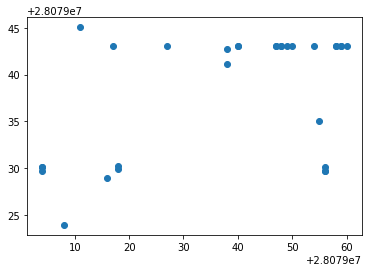

In [53]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [54]:
print(lr.score(x_test,y_test))

0.21287194823761613


In [55]:
lr.score(x_train,y_train)

0.1669411299656447

In [56]:
#lasso
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [57]:
la.score(x_test,y_test)

0.0201559045011922

In [58]:
#ridge
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [59]:
rr.score(x_test,y_test)

0.22178290665938494

In [60]:
#logistic
b=StandardScaler().fit_transform(x)


In [61]:
p=LogisticRegression(max_iter=10000)
p.fit(x,y)

LogisticRegression(max_iter=10000)

In [62]:
t=[[12,22,32,42]]

In [63]:
e=p.predict(t)
print(e)

[28079011]


In [64]:
p.classes_

array([28079004, 28079008, 28079011, 28079016, 28079017, 28079018,
       28079024, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079048, 28079049, 28079050, 28079054,
       28079055, 28079056, 28079057, 28079058, 28079059, 28079060],
      dtype=int64)

In [65]:
print(p.score(x_test,y_test))

0.23333333333333334


In [66]:
p.predict_proba(t)[0][0]

3.159198502557184e-14

In [67]:
p.predict_proba(t)[0][1]

3.662344495833868e-42

In [68]:
#elastic
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [69]:
print(p.coef_)

[0.24461539 3.02162936 0.16498059 1.17697571]


In [70]:
print(p.intercept_)

28079023.157282423


In [71]:
print(p.predict(x_test))

[28079031.01438386 28079035.53145524 28079041.59008661 28079026.51564887
 28079041.59008661 28079040.93359082 28079041.59008661 28079041.59008661
 28079031.01438386 28079041.59008661 28079031.31654687 28079031.31654687
 28079041.59008661 28079041.59008661 28079041.59008661 28079041.59008661
 28079029.53130376 28079041.59008661 28079031.31654687 28079041.59008661
 28079030.41005803 28079041.31986748 28079031.01438386 28079041.59008661
 28079041.59008661 28079041.59008661 28079041.59008661 28079041.1076771
 28079041.59008661 28079029.67864408]


In [72]:
print(p.score(x_test,y_test))

0.20766770045377259


In [73]:
#randomforest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
parameters={'max_depth':[1,12,75,3,57],
  'min_samples_leaf':[5,34,36,78,45],
           'n_estimators':[3,13,74,23,90]}

In [75]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 12, 75, 3, 57],
                         'min_samples_leaf': [5, 34, 36, 78, 45],
                         'n_estimators': [3, 13, 74, 23, 90]},
             scoring='accuracy')

In [76]:
grid_search.best_score_

0.22857142857142856

In [77]:
rfc_best=grid_search.best_estimator_

[Text(1395.0, 1997.73, 'X[1] <= 2.7\ngini = 0.934\nsamples = 47\nvalue = [1, 5, 2, 9, 1, 1, 3, 0, 5, 4, 0, 2, 4, 2\n2, 7, 1, 3, 2, 1, 5, 2, 2, 6]'),
 Text(697.5, 665.9099999999999, 'gini = 0.855\nsamples = 23\nvalue = [1, 5, 0, 9, 0, 1, 3, 0, 5, 4, 0, 2, 0, 0\n0, 0, 0, 0, 0, 1, 5, 0, 0, 0]'),
 Text(2092.5, 665.9099999999999, 'gini = 0.882\nsamples = 24\nvalue = [0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 2\n2, 7, 1, 3, 2, 0, 0, 2, 2, 6]')]

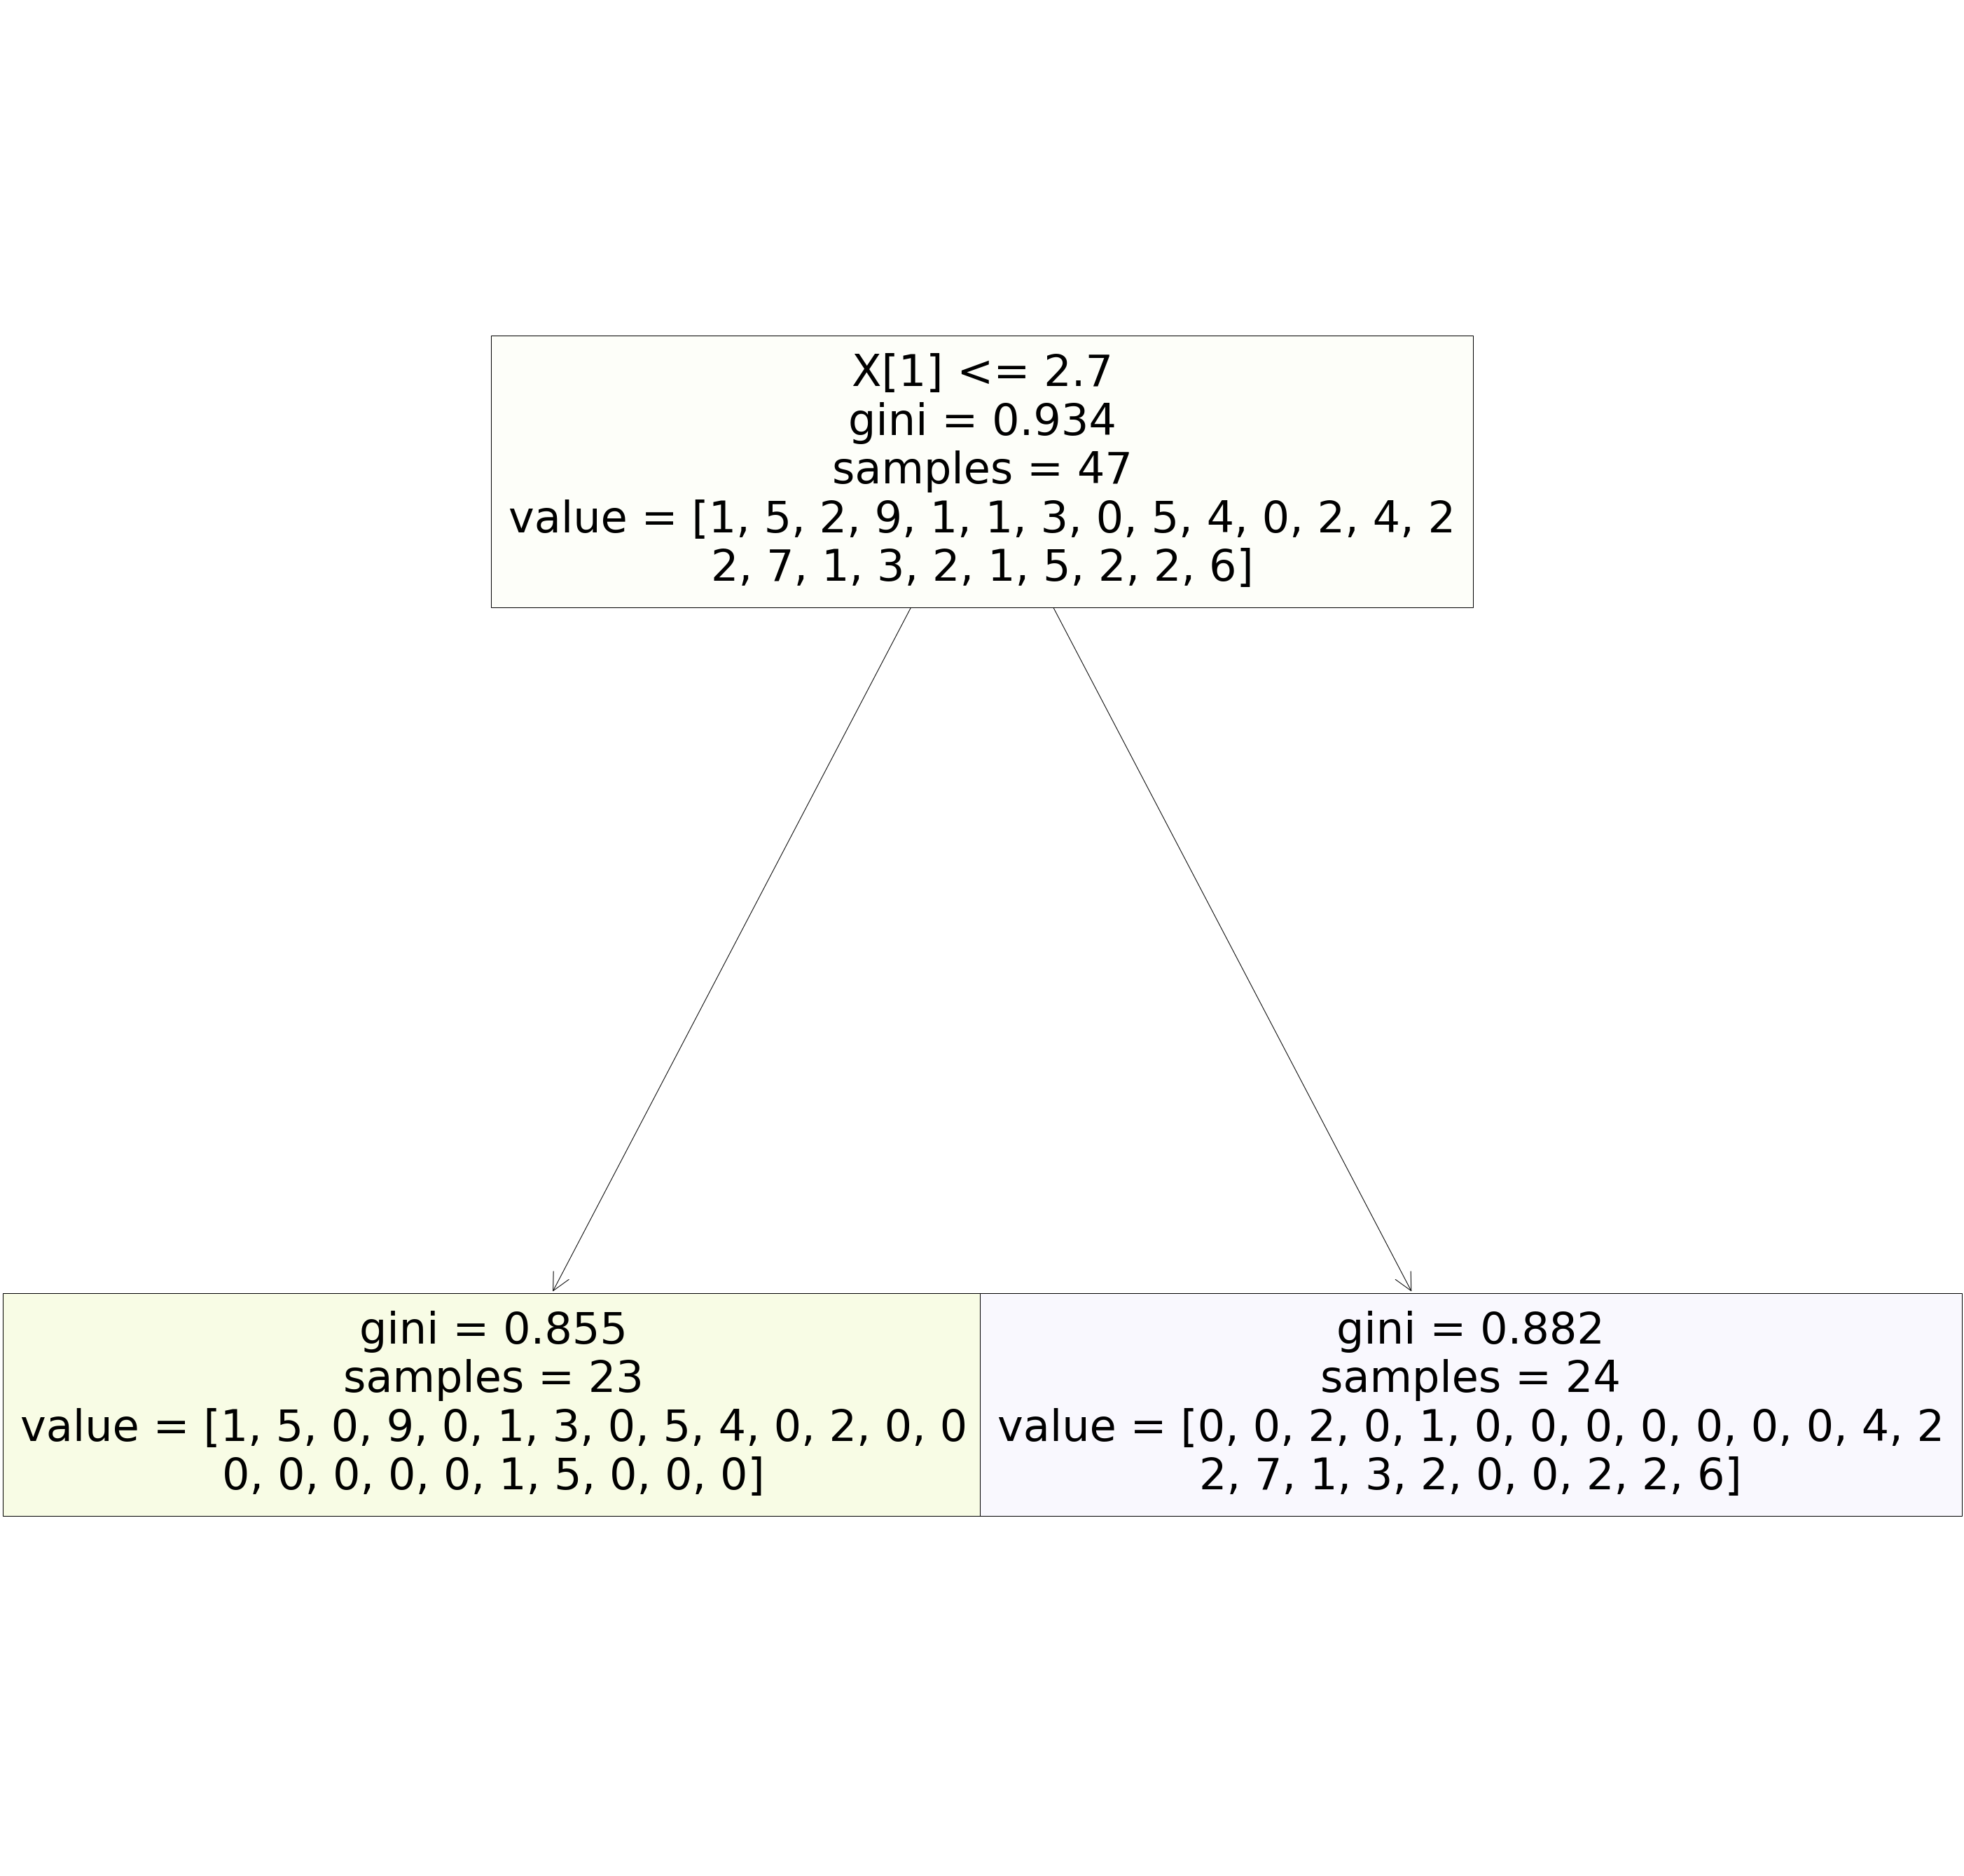

In [78]:
plt.figure(figsize=(50,49))
plot_tree(rfc_best.estimators_[5],filled=True)

# Conclusion:LOGISTIC SCORE=0.23333333333333334 is a Highest accuracy